In [6]:
import mdapy as mp 
import numpy as np
mp.init(arch="cpu") # arch="gpu" use gpu

mp.__version__ # check mdapy version

[Taichi] Starting on arch=x64


'0.7.2'

In [7]:
system = mp.System('CoCuFeNiPd-4M.dump') # create a system class from dump file

In [8]:
system.data # check data

,id,type,x,y,z
0,1,2,0.006118,-0.310917,-0.345241
1,2,4,1.901900,-0.292456,1.484880
2,3,3,-0.015641,1.584320,1.431290
3,4,5,1.862370,1.511170,-0.372278
4,5,5,3.792570,-0.331891,-0.375830
...,...,...,...,...,...
8783,8784,3,41.559500,45.481000,43.499600
8784,8785,4,43.457500,43.737100,43.608300
8785,8786,4,45.377100,43.757700,45.272700
8786,8787,4,43.455200,45.485400,45.282500


In [9]:
system.build_neighbor(rc=5., max_neigh=80) # build neighbor list with cutoff is 0.5 nm

In [10]:
system.cal_pair_distribution(rc=5., nbin=200) # calculate radiul distribution function RDF

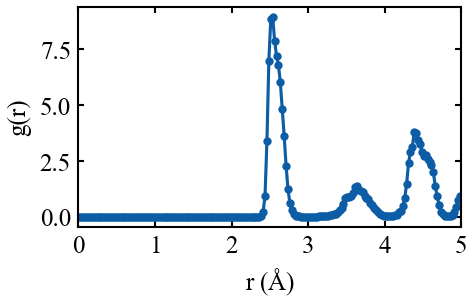

In [12]:
fig, ax = system.PairDistribution.plot() # plot RDF

In [22]:
system.cal_warren_cowley_parameter() # calculate WCP parameter

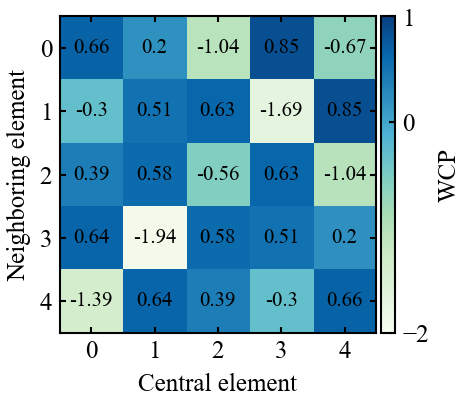

In [24]:
fig, ax = system.WarrenCowleyParameter.plot() # plot WCP matrix

In [13]:
system.cal_centro_symmetry_parameter(N=12) # calculate centrosysmetry parameters 

In [14]:
system.cal_atomic_entropy() # calculate atomic entropy

In [16]:
system.cal_common_neighbor_analysis(rc=3.) # use common neighbor analysis

In [17]:
system.data # check results again

,id,type,x,y,z,csp,atomic_entropy,cna
0,1,2,0.006118,-0.310917,-0.345241,0.100697,-4.328948,1
1,2,4,1.901900,-0.292456,1.484880,0.139544,-4.554734,1
2,3,3,-0.015641,1.584320,1.431290,0.094929,-4.729762,1
3,4,5,1.862370,1.511170,-0.372278,0.072999,-4.725634,1
4,5,5,3.792570,-0.331891,-0.375830,0.046358,-4.919010,1
...,...,...,...,...,...,...,...,...
8783,8784,3,41.559500,45.481000,43.499600,0.076815,-4.459241,1
8784,8785,4,43.457500,43.737100,43.608300,0.221225,-4.202312,1
8785,8786,4,45.377100,43.757700,45.272700,0.224541,-4.435902,1
8786,8787,4,43.455200,45.485400,45.282500,0.048309,-4.471375,1


In [18]:
# system.write_dump() # save to dump file

In [19]:
FCC = mp.LatticeMaker(4.05, 'FCC', 50, 50, 50) # Build a FCC lattice
FCC.compute()

In [20]:
# FCC.write_data() # save to data file

In [25]:
potential = mp.EAM('CoNiFeAlCu.eam.alloy') # read a eam.alloy file

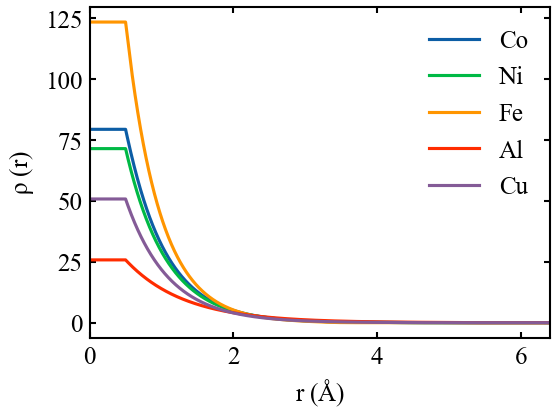

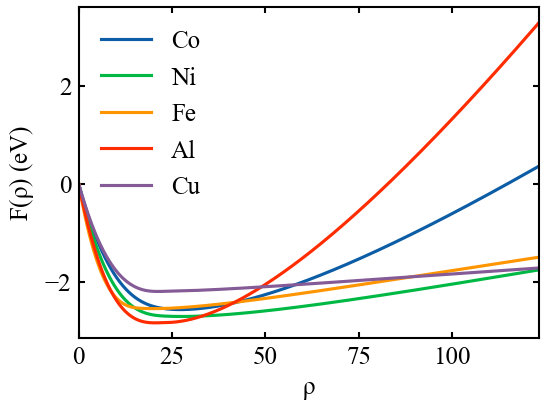

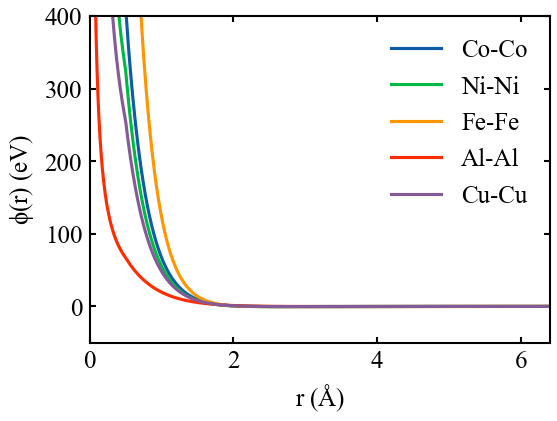

In [26]:
potential.plot() # plot the results